# Pandas Visualization

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

In [ ]:
# see the pre-defined styles provided.
plt.style.available

In [ ]:
# use the 'seaborn-colorblind' style
plt.style.use('seaborn-colorblind')

### DataFrame.plot

In [ ]:
np.random.seed(123)

df = pd.DataFrame({'A': np.random.randn(365).cumsum(0), 
                   'B': np.random.randn(365).cumsum(0) + 20,
                   'C': np.random.randn(365).cumsum(0) - 20}, 
                  index=pd.date_range('1/1/2017', periods=365))
df.head()

In [ ]:
df.plot(); # add a semi-colon to the end of the plotting call to suppress unwanted output

We can select which plot we want to use by passing it into the 'kind' parameter.

In [ ]:
df.plot('A','B', kind = 'scatter');

You can also choose the plot kind by using the `DataFrame.plot.kind` methods instead of providing the `kind` keyword argument.

`kind` :
- `'line'` : line plot (default)
- `'bar'` : vertical bar plot
- `'barh'` : horizontal bar plot
- `'hist'` : histogram
- `'box'` : boxplot
- `'kde'` : Kernel Density Estimation plot
- `'density'` : same as 'kde'
- `'area'` : area plot
- `'pie'` : pie plot
- `'scatter'` : scatter plot
- `'hexbin'` : hexbin plot

In [ ]:
# create a scatter plot of columns 'A' and 'C', with changing color (c) and size (s) based on column 'B'
df.plot.scatter('A', 'C', c='B', s=df['B'], colormap='viridis')

In [ ]:
ax = df.plot.scatter('A', 'C', c='B', s=df['B'], colormap='viridis')
ax.set_aspect('equal')

In [ ]:
df.plot.box();

In [ ]:
df.plot.hist(alpha=0.7);

[Kernel density estimation plots](https://en.wikipedia.org/wiki/Kernel_density_estimation) are useful for deriving a smooth continuous function from a given sample.

In [ ]:
df.plot.kde();

### pandas.tools.plotting

[Iris flower data set](https://en.wikipedia.org/wiki/Iris_flower_data_set)

In [ ]:
iris = pd.read_csv('iris.csv')
iris.head()

In [ ]:
pd.tools.plotting.scatter_matrix(iris);

In [ ]:
plt.figure()
pd.tools.plotting.parallel_coordinates(iris, 'Name');

# Seaborn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib notebook

In [2]:
np.random.seed(1234)

v1 = pd.Series(np.random.normal(0,10,1000), name='v1')
v2 = pd.Series(2*v1 + np.random.normal(60,15,1000), name='v2')

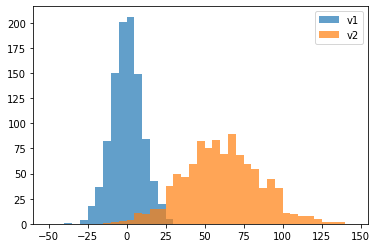

In [3]:
plt.figure()
plt.hist(v1, alpha=0.7, bins=np.arange(-50,150,5), label='v1');
plt.hist(v2, alpha=0.7, bins=np.arange(-50,150,5), label='v2');
plt.legend();

C:\Users\SAURABH SINGH\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


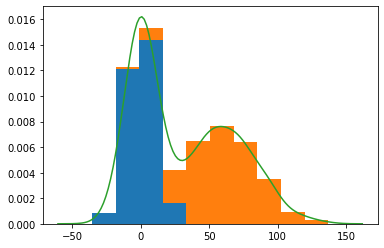

In [4]:
# plot a kernel density estimation over a stacked barchart
plt.figure()
plt.hist([v1, v2], histtype='barstacked', normed=True);
v3 = np.concatenate((v1,v2))
sns.kdeplot(v3);

In [ ]:
plt.figure()
# we can pass keyword arguments for each individual component of the plot
sns.distplot(v3, hist_kws={'color': 'Teal'}, kde_kws={'color': 'Navy'});

In [ ]:
sns.jointplot(v1, v2, alpha=0.4);

In [ ]:
grid = sns.jointplot(v1, v2, alpha=0.4);
grid.ax_joint.set_aspect('equal')

In [ ]:
sns.jointplot(v1, v2, kind='hex');

In [ ]:
# set the seaborn style for all the following plots
sns.set_style('white')

sns.jointplot(v1, v2, kind='kde', space=0);

In [ ]:
iris = pd.read_csv('iris.csv')
iris.head()

In [ ]:
sns.pairplot(iris, hue='Name', diag_kind='kde', size=2);

In [ ]:
plt.figure(figsize=(8,6))
plt.subplot(121)
sns.swarmplot('Name', 'PetalLength', data=iris);
plt.subplot(122)
sns.violinplot('Name', 'PetalLength', data=iris);